# Introduction to K Mean Clustering With Toy Example

## 1. Import library

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

## 2. Create Data
Next, we create data by taking points from normal distributions with means at points (2, 2), (8, 3), and (3, 6), with the same covariance matrix which is the identity matrix. Each cluster has 500 points. (Note that each data point is a row in the data matrix.)

In [86]:
means = [[0, 3], [4, 1], [7,5],[3, 8]]
cov = [[1, 0], [0, 1]]
N = 300
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3],cov, N)
X = np.concatenate((X0, X1, X2,X3), axis = 0)
K = 4

original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N).T

## 3. Display Data
Displaying data on a graph requires a kmeans_display function. Then, we display the data according to the initial labels.

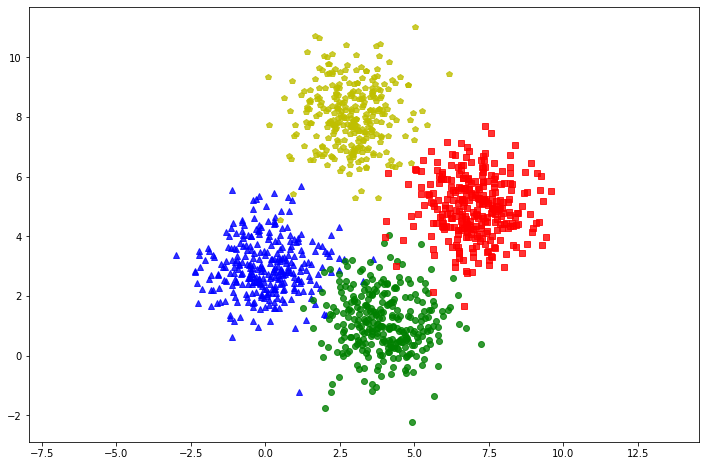

In [87]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.figure(figsize=(12,8))
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'yp', markersize = 6, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

## 4. Some functions for KMean

In [88]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0],k,replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

## 5. Main code for KMean Clustering

In [89]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1],K)
        if has_converged(centers[-1],new_centers):
            break
        centers.append(new_centers)
        it += 1


    return (centers,labels,it)


Centers found by our algorithm:
[[-0.01674379  2.98694916]
 [ 7.02218     4.97770373]
 [ 3.96516099  1.12134408]
 [ 2.87503683  8.03470399]]


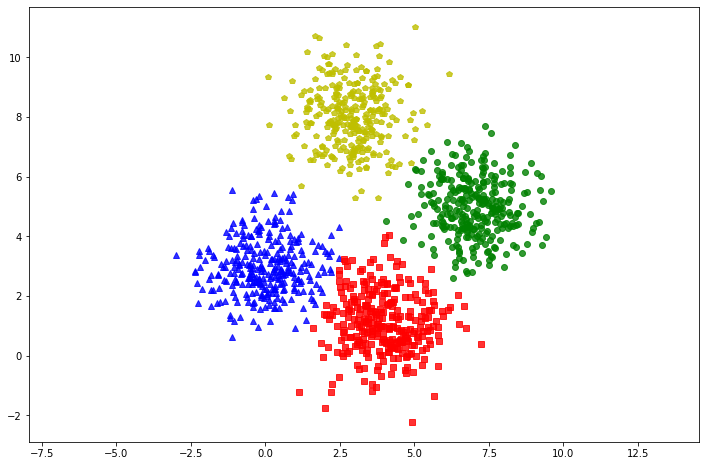

In [90]:
# Run code
(centers,labels,it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])